### Deriving Derivatives

#### Soklakov Elasticity equation

$$ \dfrac{dlnF}{dlnf} = \dfrac{1}{R} $$

where $f$ is the payoff of the Growth-Optimizing Invesotr and $F$ is the payoff for the General Investor.  This simple equation is the central technical result of this paper. It gives us a fundamental link between payoff elasticity and risk aversion. The more risk aversion we have the less elastic is the payoff.

On the practical side, this equation allows us to compute the optimal payoff $F$ from the growth-optimal $f$ and the risk aversion profile $R$ of the client. Conversely, we are now also able to compute risk aversion profiles directly from clients’ positions.

We choose two different utility functions for the preferences of the investor : (i) the __exponential utility function__ $- \dfrac{e^{-\gamma S_{T}}}{\gamma}$ and (ii) the __power utility function__ $\dfrac{S_{T}^{1-\gamma}-1}{1-\gamma}$. We derive the payoffs $F$,$G$ for the exponential and power utility functions repsectively:

$$ R(F(x)) = \dfrac{f'(x)}{f(x)} * \dfrac{F(x)}{F'(x)} $$

$$ F(x) = f^{\tfrac{1}{\gamma}}(x) $$

$$ G(x) = \dfrac{ln(f(x))}{\gamma}$$


In [234]:
import numpy as np

def exp_util(x,gamma):
    return x ** (1 / gamma)

def pow_util(x,gamma):
    return np.log(x) / gamma

In the following we assume different beliefs that an investor can have and based on them and the risk aversion implied by the utility functions we derive the corresponding payoffs for the General Investor.

#### Shift in the drift 

Consider an investor who has a view on the expected value of the distribution. A view that the expected value of the index should be higher than suggested by the market corresponds to a believed distribution which is biased towards higher values of the index. In the small enough near-ATM region this is easily recognizable as the profile of a forward contract.

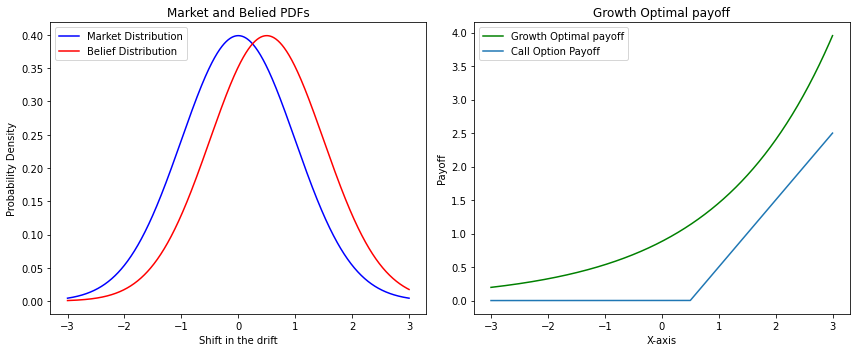

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from scipy.stats import gaussian_kde


mu = 0 
sigma = 1  

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu+0.5, sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

strike_price = 0.5
call_option_payoff = call_option_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color = 'blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color = 'red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, call_option_payoff, label='Call Option Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

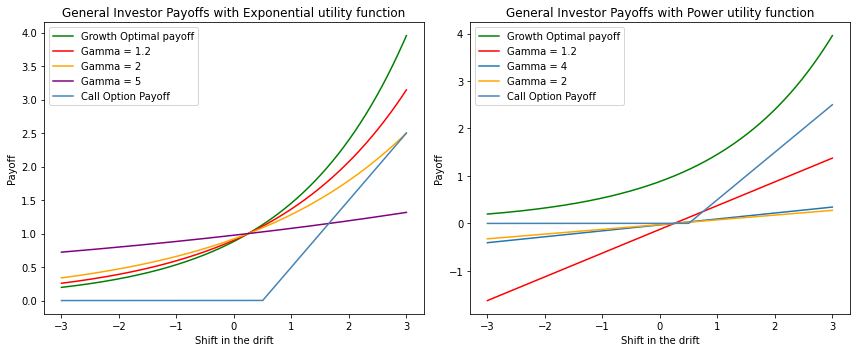

In [255]:

exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,6):
    exp_general_payoffs.append(exp_util(growth_optimal_payoff,1 + gamma*0.1)) 
    pow_general_payoffs.append(pow_util(growth_optimal_payoff,gamma))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[0].plot(x, exp_general_payoffs[1], label='Gamma = 1.2', color = 'red')
axs[0].plot(x, exp_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[0].plot(x, exp_util(growth_optimal_payoff,5), label='Gamma = 5', color = 'purple')
axs[0].plot(x, call_option_payoff, label='Call Option Payoff', color = 'steelblue')
axs[0].set_title('General Investor Payoffs with Exponential utility function')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, pow_general_payoffs[0], label='Gamma = 1.2', color = 'red')
axs[1].plot(x, pow_general_payoffs[3], label='Gamma = 4')
axs[1].plot(x, pow_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[1].plot(x, call_option_payoff, label='Call Option Payoff', color = 'steelblue')
axs[1].set_title('General Investor Payoffs with Power utility function')
axs[1].set_xlabel('Shift in the drift')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

In the case of the exponential utility function when the risk aversion increases (parameter gamma increases) and so our investor does not like risk we observe that his derived payoff is similar to the one of the growth optimizing payoff, as well as the call option payoff and also he is willing to sacrifice his potential gain for some better downside protection.

For the case of the power utility as the risk aversion increases the resulting payoff is similar to a forward contract which is less risky than the growth optimizer payoff which is similar to a call option. Again as gamma increases the investor is willing to sacrifice his potential gain for some better downside protection.

#### Shift in the volatility

Similarly, a belief that the market underestimates volatility corresponds to a believed distribution which is wider but not as tall as the market-implied distribution. Again, we can sketch the growth-optimal profile and see that it works pretty much the same way as the textbook vanilla combinations – straddles and strangles. These classical vanilla combinations can be considered as crude approximations of the growth-optimal payoff.

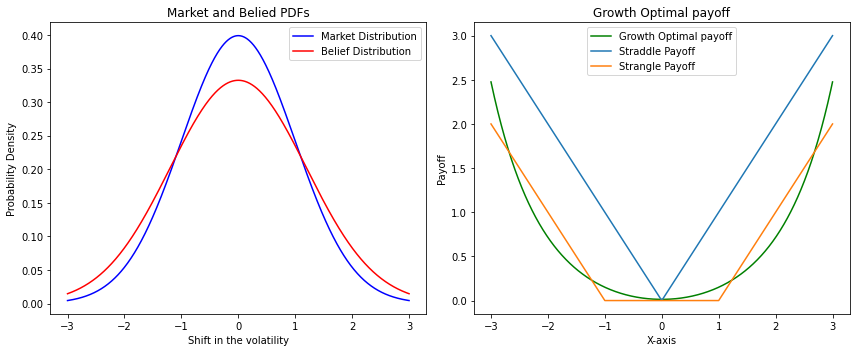

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu, 1.2 * sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

def straddle_payoff(spot_price, strike_price):
    call_payoff = call_option_payoff(spot_price, strike_price)
    put_payoff = put_option_payoff(spot_price, strike_price)
    return call_payoff + put_payoff

def strangle_payoff(spot_price, call_strike, put_strike):
    call_payoff = call_option_payoff(spot_price, call_strike)
    put_payoff = put_option_payoff(spot_price, put_strike)
    return call_payoff + put_payoff

straddle_strike = 0
strangle_put_strike = -1
strangle_call_strike = 1

straddle_payoff_values = straddle_payoff(x, straddle_strike)
strangle_payoff_values = strangle_payoff(x, strangle_call_strike, strangle_put_strike)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color='red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the volatility')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff - 0.82, label='Growth Optimal payoff', color='green')
axs[1].plot(x, straddle_payoff_values, label='Straddle Payoff')
axs[1].plot(x, strangle_payoff_values, label='Strangle Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()


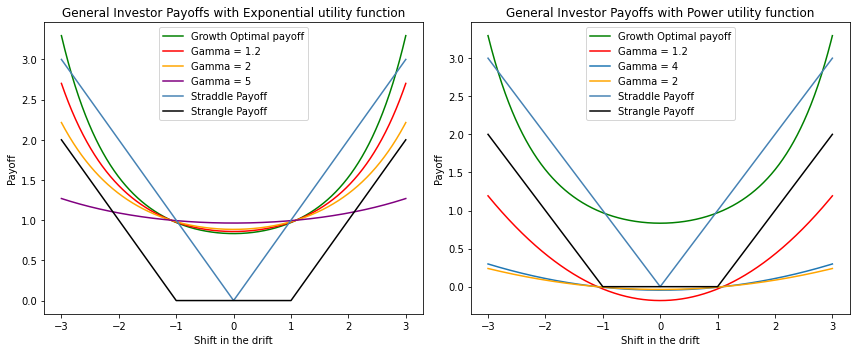

In [264]:

exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,6):
    exp_general_payoffs.append(exp_util(growth_optimal_payoff,1 + gamma*0.1)) 
    pow_general_payoffs.append(pow_util(growth_optimal_payoff,gamma))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[0].plot(x, exp_general_payoffs[1], label='Gamma = 1.2', color = 'red')
axs[0].plot(x, exp_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[0].plot(x, exp_util(growth_optimal_payoff,5), label='Gamma = 5', color = 'purple')
axs[0].plot(x, straddle_payoff_values, label='Straddle Payoff',color = 'steelblue')
axs[0].plot(x, strangle_payoff_values, label='Strangle Payoff',color = 'black')
axs[0].set_title('General Investor Payoffs with Exponential utility function')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, pow_general_payoffs[0], label='Gamma = 1.2', color = 'red')
axs[1].plot(x, pow_general_payoffs[3], label='Gamma = 4')
axs[1].plot(x, pow_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[1].plot(x, straddle_payoff_values, label='Straddle Payoff',color = 'steelblue')
axs[1].plot(x, strangle_payoff_values, label='Strangle Payoff',color = 'black')
axs[1].set_title('General Investor Payoffs with Power utility function')
axs[1].set_xlabel('Shift in the drift')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Shift in the skew

Moving on to more complex examples, let us see how we could help investors with views on the skew. For a simple, analytically tractable illustration, recall the definition of a skew-normal distribution.

The probability density for a skew-normal random variable is defined as $ SN(x,\xi) = 2\phi (x)\Phi(\xi x) $, where $\phi (x)$ and $ \Phi(x) $ are the probability density for the standard normal variable and the corresponding cumulative distribution function, respectively.

To this end, imagine a market which implies a normal distribution, $ m(x) = SN(x,0) $ for some variable x. Now consider an investor which does not agree with the market. The investor believes that, in reality, there is a skew and uses a skew-normal distribution, $ b(x) = SN(x,\xi) $, to describe this belief. For the growth-optimal payoff we compute:

$$ f(x) = \dfrac{b(x)}{m(x)} = \dfrac{SN(x,\xi)}{SN(x,0)} = 2\Phi (\xi x) $$

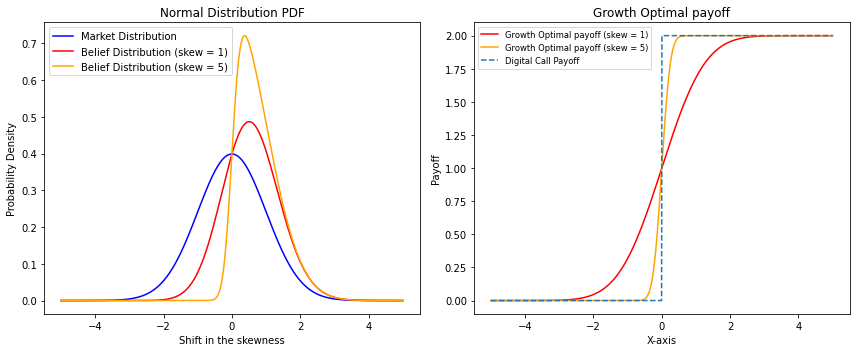

In [266]:
from scipy.stats import skewnorm

a1 = 1  # skewness parameter
a2 = 5
loc = 0 
scale = 1  


x = np.linspace(-5, 5, 1000)

market_pdf = skewnorm.pdf(x, 0, loc, scale)
belief_pdf1 = skewnorm.pdf(x, a1, loc, scale)
belief_pdf2 = skewnorm.pdf(x, a2, loc, scale)
growth_optimal_payoff1 = belief_pdf1 / market_pdf
growth_optimal_payoff2 = belief_pdf2 / market_pdf

def digital_call_payoff(spot_price, strike_price, payoff_amount=2):
    return np.where(spot_price > strike_price, payoff_amount, 0)

strike_price = 0
digital_call_payoff_values = digital_call_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf1, label='Belief Distribution (skew = 1)', color='red')
axs[0].plot(x, belief_pdf2, label='Belief Distribution (skew = 5)', color='orange')

axs[0].set_title('Normal Distribution PDF')
axs[0].set_xlabel('Shift in the skewness')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff1, label='Growth Optimal payoff (skew = 1)', color='red')
axs[1].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff (skew = 5)', color='orange')
axs[1].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend(loc='upper left',fontsize='small')

plt.tight_layout()
plt.show()

We immediately recognize the profile of a cumulative distribution function which contains a classic skew product – the digital – as a limiting case.

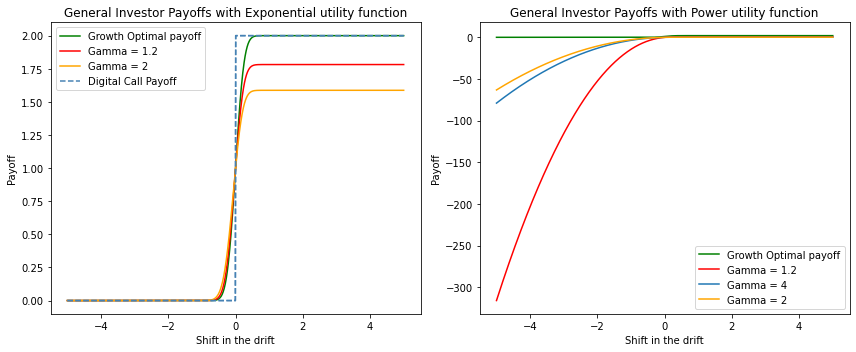

In [269]:
exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,6):
    exp_general_payoffs.append(exp_util(growth_optimal_payoff2,1 + gamma*0.1)) 
    pow_general_payoffs.append(pow_util(growth_optimal_payoff2,gamma))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff', color='green')
axs[0].plot(x, exp_general_payoffs[1], label='Gamma = 1.2', color = 'red')
axs[0].plot(x, exp_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[0].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--',color = 'steelblue')
axs[0].set_title('General Investor Payoffs with Exponential utility function')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff', color='green')
axs[1].plot(x, pow_general_payoffs[0], label='Gamma = 1.2', color = 'red')
axs[1].plot(x, pow_general_payoffs[3], label='Gamma = 4')
axs[1].plot(x, pow_general_payoffs[4], label='Gamma = 2', color = 'orange')
axs[0].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--',color = 'steelblue')
axs[1].set_title('General Investor Payoffs with Power utility function')
axs[1].set_xlabel('Shift in the drift')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Skew slope near ATM

#### EURO STOXX 50® Index Options (OESX)

We downloaded options data for the EURO STOXX 50® Index Options (OESX) on 29th of November with options maturing o 17th of May from https://www.eurex.com/ex-en/markets/idx/stx/blc/EURO-STOXX-50-Index-Options-46548. We compute the ~ 6 months skew for STOXX50E as was implied by the market on 29/11/2023.

In [204]:
callba = [(301.60,310.10),(283.40,291.50),(265.50,273.30),(248.40,255.20),(231.10,238.30),(215.10,221.20),
        (199.20,205.00),(183.40,189.90),(169.10,174.40),(155.10,159.50),(142.40,145.50),(128.30,133.50),
        (116.20,121.80),(104.80,110.20),(94.60,97.90),(84.90,87.80),(75.70,78.20),(66.40,71.00),
        (59.40,61.80),(52.20,54.70),(46.10,47.80),(40.30,42.00),(34.60,36.70),(29.80,32.60),(26.00,28.10),
        (22.40,24.40),(18.80,21.70),(16.30,18.10)]

strikes = [3675,3700,3725,3750,3775,3800,3825,3850,3875,3900,3925,3950,3975,4000,4025,4050,4075,4100,
           4125,4150,4175,4200,4225,4250,4275,4300,4325,4350,4375,4400,4425,4450,4475,4500,4525,4550,
           4575,4600,4625,4650,4675,4700,4725,4750,4775,4800,4825]

putba = [(30.60,32.70),(32.50,34.00),(34.30,36.20),(36.50,38.10),(37.60,40.70),(40.20,43.30),
       (43.20,45.20),(45.70,48.30),(48.60,50.30),(50.90,54.30),(53.90,57.90),(57.10,61.30),
       (61.80,64.30),(65.70,67.70),(69.80,72.00),(74.20,76.50),(77.80,82.30),(83.00,87.10),
       (88.00,92.80),(94.00,98.40),(100.40,103.50),(106.20,111.20),(113.10,118.20),(120.50,125.80),
       (128.40,133.90),(136.80,142.50),(146.50,150.20),(156.00,160.90),(166.20,171.40),(176.60,183.00),
       (188.60,194.40),(200.80,206.90),(213.30,220.30),(227.10,234.40),(241.40,249.20),(256.20,264.60),
       (271.80,280.80)]

call = [np.mean(i) for i in callba]
put  = [np.mean(i) for i in putba]

date1 = datetime(2023, 11, 29)
date2 = datetime(2023, 5, 17)
TtM = round((date1 - date2).days / 365,3)


def black_scholes_option_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price


def implied_volatility(option_price, S, K, T, r, option_type='call'):
    difference = lambda sigma: black_scholes_option_price(S, K, T, r, sigma, option_type) - option_price
    implied_vol = fsolve(difference, 0.2)
    return implied_vol[0]


data = {'Date'  :   ['18:14 29/11'] * 47,
        'Stock' :   [4370.53] * 47,
        'Call'  :   [np.nan] * 19 + call,
        'Strike':   strikes,
        'Put'   :   put + [np.nan] * 10,
        'Risk_Free_rate': [-0.005] * 47,# 03721
        'Time_to_Maturity': [TtM] * 47
       }

df = pd.DataFrame(data)
df['Implied_Volatility'] = df.apply(lambda row: 
                                    implied_volatility(row['Call'], 
                                                       row['Stock'], 
                                                       row['Strike'], 
                                                       row['Time_to_Maturity'], 
                                                       row['Risk_Free_rate'], 
                                                       option_type='call')
                                       if not math.isnan(row['Call'])
                                       else implied_volatility(row['Put'], 
                                                               row['Stock'], 
                                                               row['Strike'],
                                                               row['Time_to_Maturity'], 
                                                               row['Risk_Free_rate'], 
                                                               option_type='put'), axis=1)
#df

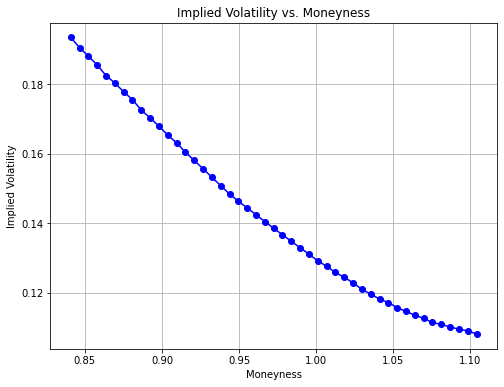

In [205]:
df['Moneyness'] =  df['Strike'] / df['Stock'] 

plt.figure(figsize=(8, 6))
plt.plot(df['Moneyness'], df['Implied_Volatility'], color='blue', marker='o')
plt.title('Implied Volatility vs. Moneyness')
plt.xlabel('Moneyness')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.show()

Our next task is to tickle the implied volatility smile of the market a bit for two different investors for their objective beliefs. We then observe the different growth optimal payoffs that we derive.

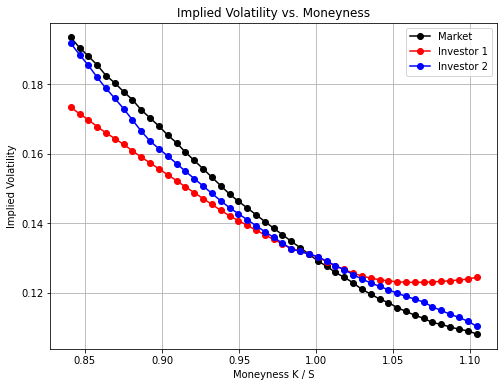

In [206]:

# ATM position
atm_index = 27
implied_volatility = df['Implied_Volatility']

### Investor 1 ###

# Adjust the implied volatilities
market_slope = np.gradient(implied_volatility)
tilted_slope1 = market_slope.copy()

# Tilt the slope near ATM to be half as steep
tilted_slope1[atm_index-1:atm_index+2] *= 0.5
tilted_slope1[:atm_index] *= 0.7

tilted_slope1[:atm_index] *= 0.5
tilted_implied_volatility1 = np.cumsum(tilted_slope1) 
tilted_implied_volatility1 += implied_volatility[atm_index] - tilted_implied_volatility1[atm_index]


# Gradually increase the difference as you move away from ATM
distance_from_atm = np.arange(len(implied_volatility)) - atm_index
tilted_slope1[atm_index:] *= 1 - 0.08 * distance_from_atm[atm_index:]

# Integrate the tilted slope to get the tilted implied volatility
tilted_implied_volatility1 = np.cumsum(tilted_slope1) 
tilted_implied_volatility1 += implied_volatility[atm_index] - tilted_implied_volatility1[atm_index]

### Investor 2 ###

tilted_slope2 = market_slope.copy()
tilted_slope2[atm_index-1:atm_index+2] *= 0.5
tilted_slope2[:atm_index-1] *= 1.1
tilted_slope2[:10] *= 1.4


# Adjust the slope to be smaller to the left of ATM
tilted_slope2[:atm_index] *= 0.8  # Adjust as needed

#tilted_slope2[:20] *= 1.5

# Adjust the slope to be larger to the right of ATM
tilted_slope2[atm_index:] *= 0.80 # Adjust as needed
tilted_slope2[-6:] *= 2

# Integrate the tilted slope to get the tilted implied volatility
tilted_implied_volatility2 = np.cumsum(tilted_slope2) 
tilted_implied_volatility2 += implied_volatility[atm_index] - tilted_implied_volatility2[atm_index]



plt.figure(figsize=(8, 6))
plt.plot(df['Moneyness'], df['Implied_Volatility'], color='black', marker='o',label='Market')
plt.plot(df['Moneyness'], tilted_implied_volatility1, color='red', marker='o',label='Investor 1')
plt.plot(df['Moneyness'], tilted_implied_volatility2, color='blue', marker='o',label='Investor 2')
plt.title('Implied Volatility vs. Moneyness')
plt.xlabel('Moneyness K / S')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


Overlayed are two additional skew curves defining the beliefs of two possible investors. The investors practically agree on the skew slope near ATM. Both believe that it should be almost exactly half as steep as the market-implied. 

The visible difference between the investors is in propagation of their near-ATM belief into the wings. Investor 1 takes a global view by tilting the entire volatility curve. Investor 2, by contrast, limits his view to the ATM region and does not challenge the market in the wings.

Now to derive the probability densities from the three different implied volatility smiles. We first need to interpolate the smiles (we choose a cubic spline), we derive the corresponding call option prices for those implied volatilies with the BS formula and then using the Breeden-Litzenberger formula we construct the corresponding probability densities.

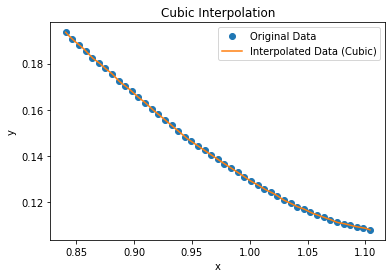

In [215]:
# Create a cubic spline interpolation function for the implied volatility smiles

inter_values = 47
cs_market = CubicSpline(df['Moneyness'],df['Implied_Volatility'])
x_moneyness = np.linspace(0.840859, 1.103985, inter_values)
y_impliedvol_market = cs_market(x_moneyness)

cs_investor1 = CubicSpline(df['Moneyness'],tilted_implied_volatility1)
y_impliedvol_investor1 = cs_investor1(x_moneyness)

cs_investor2 = CubicSpline(df['Moneyness'],tilted_implied_volatility2)
y_impliedvol_investor2 = cs_investor2(x_moneyness)

# Compute the call options prices through implied volatilities for market and investors

S = np.array([4370.53] * inter_values)
T = np.array([0.537] * inter_values)
r = np.array([-0.005] * inter_values)
K = x_moneyness * 4370.53

call_prices_market = black_scholes_option_price(S, K, T, r, y_impliedvol_market, option_type='call')
call_prices_investor1 = black_scholes_option_price(S, K, T, r, y_impliedvol_investor1, option_type='call')
call_prices_investor2 = black_scholes_option_price(S, K, T, r, y_impliedvol_investor2, option_type='call')





# Plot the original and interpolated data
plt.plot(df['Moneyness'], df['Implied_Volatility'], 'o', label='Original Data')
plt.plot(x_interp_market, y_interp_market, '-', label='Interpolated Data (Cubic)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Interpolation')
plt.show()

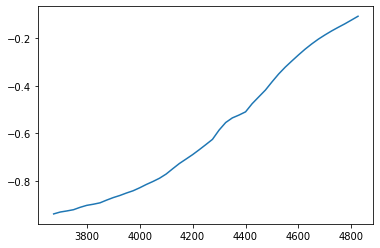

In [216]:
S = np.array([4370.53] * inter_values)
T = np.array([0.537] * inter_values)
r = np.array([-0.005] * inter_values)
K = x_moneyness * 4370.53




Crange = black_scholes_option_price(S, K, T, r, y_impliedvol_market, option_type='call')
Crange = call_prices_investor1
first_deriv = np.gradient(Crange, K, edge_order=0)
second_deriv = np.gradient(first_deriv, K, edge_order=0)

#black_scholes_option_price(S, K, T, r, sigma, option_type='call')
#plt.plot(K, Crange)
plt.plot(K, first_deriv)

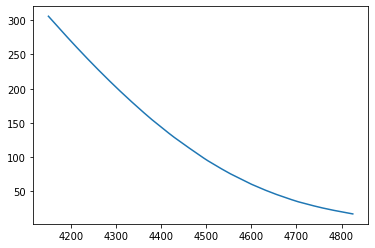

In [217]:
S = np.array(df['Stock'])
K = np.array(df['Strike'])
T = np.array(df['Time_to_Maturity'])
r = np.array(df['Risk_Free_rate'])
IV = np.array(df['Implied_Volatility'])

C = black_scholes_option_price(S, K, T, r, IV, option_type='call')
C = np.array(df['Call'])
x_interp = np.linspace(np.min(K),np.max(K),10000)
y_interp = np.interp(x_interp, K, C)
first_deriv = np.gradient(y_interp, x_interp, edge_order=0)
second_deriv = np.gradient(first_deriv,x_interp , edge_order=0)

plt.plot(x_interp , y_interp)

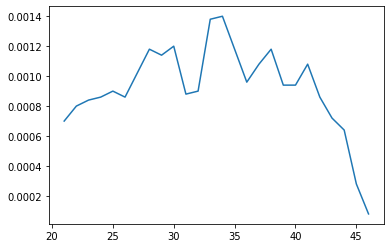

In [210]:
def breeden_litzenberger(call_prices, strikes, r, T):
    # Calculate the central differences for the second derivative
    delta_k = np.mean(np.diff(strikes))
    d2C_dK2 = np.gradient(np.gradient(call_prices, delta_k), delta_k)

    # Compute the risk-neutral PDF using the Breeden-Litzenberger formula
    pdf = np.exp(r * T) * d2C_dK2

    return pdf

C = black_scholes_option_price(S, K, T, r, IV, option_type='call')
C = np.array(df['Call'])
plt.plot(breeden_litzenberger(C,K,r,T))

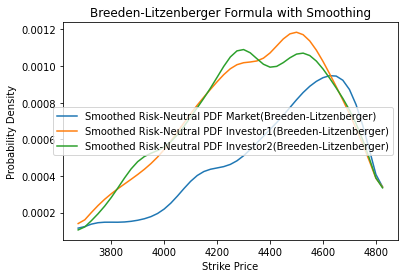

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def breeden_litzenberger_smoothed(call_prices, strikes, r, T, sigma):
    # Calculate the central differences for the second derivative
    delta_k = np.mean(np.diff(strikes))
    d1 = np.gradient(call_prices, delta_k)
    d1_smooth = gaussian_filter1d(d1, sigma=sigma, mode='nearest')
    d2C_dK2 = np.gradient(d1_smooth, delta_k)

    # Compute the risk-neutral PDF using the Breeden-Litzenberger formula
    pdf_direct = np.exp(r * T) * d2C_dK2

    # Apply Gaussian filter for smoothing
    #pdf_smoothed = gaussian_filter1d(pdf_direct, sigma=sigma, mode='nearest')

    return pdf_direct#pdf_smoothed

# Example data

r = 0.05
T = 1.0
sigma = 3# Adjust this parameter based on your preference

# Calculate risk-neutral PDF using Breeden-Litzenberger formula and smoothing
C = black_scholes_option_price(S, K, T, r, IV, option_type='call')
pdf_smoothed = breeden_litzenberger_smoothed(C, K, r, T, sigma)
pdf_smoothed1 = breeden_litzenberger_smoothed(call_prices_investor1, K, r, T, sigma)
pdf_smoothed2 = breeden_litzenberger_smoothed(call_prices_investor2, K, r, T, sigma)


# Plot the results
plt.plot(K, pdf_smoothed, label='Smoothed Risk-Neutral PDF Market(Breeden-Litzenberger)')
plt.plot(K, pdf_smoothed1, label='Smoothed Risk-Neutral PDF Investor1(Breeden-Litzenberger)')
plt.plot(K, pdf_smoothed2, label='Smoothed Risk-Neutral PDF Investor2(Breeden-Litzenberger)')
plt.xlabel('Strike Price')
plt.ylabel('Probability Density')
plt.title('Breeden-Litzenberger Formula with Smoothing')
plt.legend()
plt.show()


In [214]:
tilted_implied_volatility1,tilted_implied_volatility2

(array([0.17341733, 0.17153273, 0.16978435, 0.16782563, 0.16602075,
        0.16438673, 0.16269122, 0.1608511 , 0.15901203, 0.1573889 ,
        0.15565911, 0.15397578, 0.15225584, 0.15048194, 0.14881416,
        0.14712519, 0.14542092, 0.1437223 , 0.14214955, 0.14075556,
        0.13940059, 0.13802674, 0.13666579, 0.13533259, 0.13401333,
        0.13270862, 0.13206427, 0.13111716, 0.13031305, 0.12890571,
        0.12769471, 0.12668704, 0.12564321, 0.12480164, 0.12418754,
        0.1237434 , 0.12340108, 0.12314483, 0.12301324, 0.12297349,
        0.12301566, 0.12312004, 0.12324905, 0.12344204, 0.12364338,
        0.12394582, 0.12441246]),
 array([0.19184793, 0.18853103, 0.18545388, 0.18200652, 0.17882994,
        0.17595407, 0.17296997, 0.16973136, 0.16649459, 0.16363789,
        0.16146329, 0.1593471 , 0.15718489, 0.15495485, 0.15285821,
        0.15073493, 0.14859242, 0.14645701, 0.14447985, 0.1427274 ,
        0.14102401, 0.13929689, 0.13758598, 0.13590995, 0.13425146,
        0.1326